# Stock Comparison Analysis

This notebook provides tools to compare multiple stocks side by side using the existing stock analysis modules. It enables detailed comparison of price movements, fundamental ratios, technical indicators, and AI-powered analysis across multiple stocks.

## Import Required Libraries and Custom Modules

We'll import the custom modules from the src directory that contain all the functionality we need.

In [1]:
# Add the project root directory to the Python path to allow importing from src
import sys
import os

# Get the current directory
current_dir = os.path.dirname(os.path.abspath('__file__'))

# Go up one level to reach the project root if needed
project_root = os.path.dirname(current_dir) if current_dir.endswith('src') else current_dir

# Add the project root to Python path if it's not already there
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    print(f"Added {project_root} to Python path")
else:
    print("Project root already in Python path")

# Show the current Python path for debugging
print(f"Current working directory: {os.getcwd()}")
print(f"Python path: {sys.path}")

Added /Users/camiloramirezf/Documents/agent_repos/stock_fundamentals to Python path
Current working directory: /Users/camiloramirezf/Documents/agent_repos/stock_fundamentals
Python path: ['/Users/camiloramirezf/Documents/agent_repos/stock_fundamentals', '/Users/camiloramirezf/.pyenv/versions/3.10.4/lib/python310.zip', '/Users/camiloramirezf/.pyenv/versions/3.10.4/lib/python3.10', '/Users/camiloramirezf/.pyenv/versions/3.10.4/lib/python3.10/lib-dynload', '', '/Users/camiloramirezf/Documents/agent_repos/stock_fundamentals/.venv/lib/python3.10/site-packages']


In [2]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from IPython.display import display, Markdown, Image, HTML

# Import Plotly for interactive visualizations
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Import Yahoo Finance for direct data fetching
import yfinance as yf

# Import our custom modules
from src.data import StockData
from src.financial_analysis import FinancialAnalysis
from src.technical_analysis import TechnicalAnalysis
from src.visualization import StockVisualization
from src.ai_analysis import AIAnalysis
from src.reporting import ReportGenerator

# Set visualization styles
plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

# To silence future warnings
import warnings
warnings.filterwarnings('ignore')

## Define Stock Symbols for Comparison

First, we'll define the list of stock symbols we want to compare.

In [3]:
# Define the stock symbols to compare
symbols = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META']  # Example tech stocks

# Create a dictionary to store StockData objects for each symbol
stocks = {}

## Data Collection

Let's gather historical price data, company information, and financial statements for each stock.

In [4]:
# Function to fetch data for multiple stocks using our StockData class
def fetch_multiple_stocks(symbols, years=2):
    """
    Fetch data for multiple stock symbols
    
    Parameters:
    symbols (list): List of stock ticker symbols
    years (int): Number of years of historical data
    
    Returns:
    dict: Dictionary of StockData objects indexed by symbol
    """
    stock_dict = {}
    
    for symbol in symbols:
        print(f"\nFetching data for {symbol}...")
        stock = StockData(symbol)
        if stock.fetch_stock_data(years=years):
            stock.fetch_financial_statements()
            stock_dict[symbol] = stock
            company_info = stock.get_company_info()
            print(f"Company: {company_info['company_name']}")
            print(f"Sector: {company_info['sector']}")
            print(f"Current Price: ${company_info['current_price']}")
        else:
            print(f"Failed to fetch data for {symbol}")
    
    return stock_dict

# Fetch data for all symbols
stocks = fetch_multiple_stocks(symbols)


Fetching data for AAPL...
Company: Apple Inc.
Sector: Technology
Current Price: $205.35

Fetching data for MSFT...
Company: Microsoft Corporation
Sector: Technology
Current Price: $435.28

Fetching data for AMZN...
Company: Amazon.com, Inc.
Sector: Consumer Cyclical
Current Price: $189.98

Fetching data for GOOGL...
Company: Alphabet Inc.
Sector: Communication Services
Current Price: $164.03

Fetching data for META...
Company: Meta Platforms, Inc.
Sector: Communication Services
Current Price: $597.02


## Price Comparison

Now, let's compare the price performance of all stocks using our visualization module.

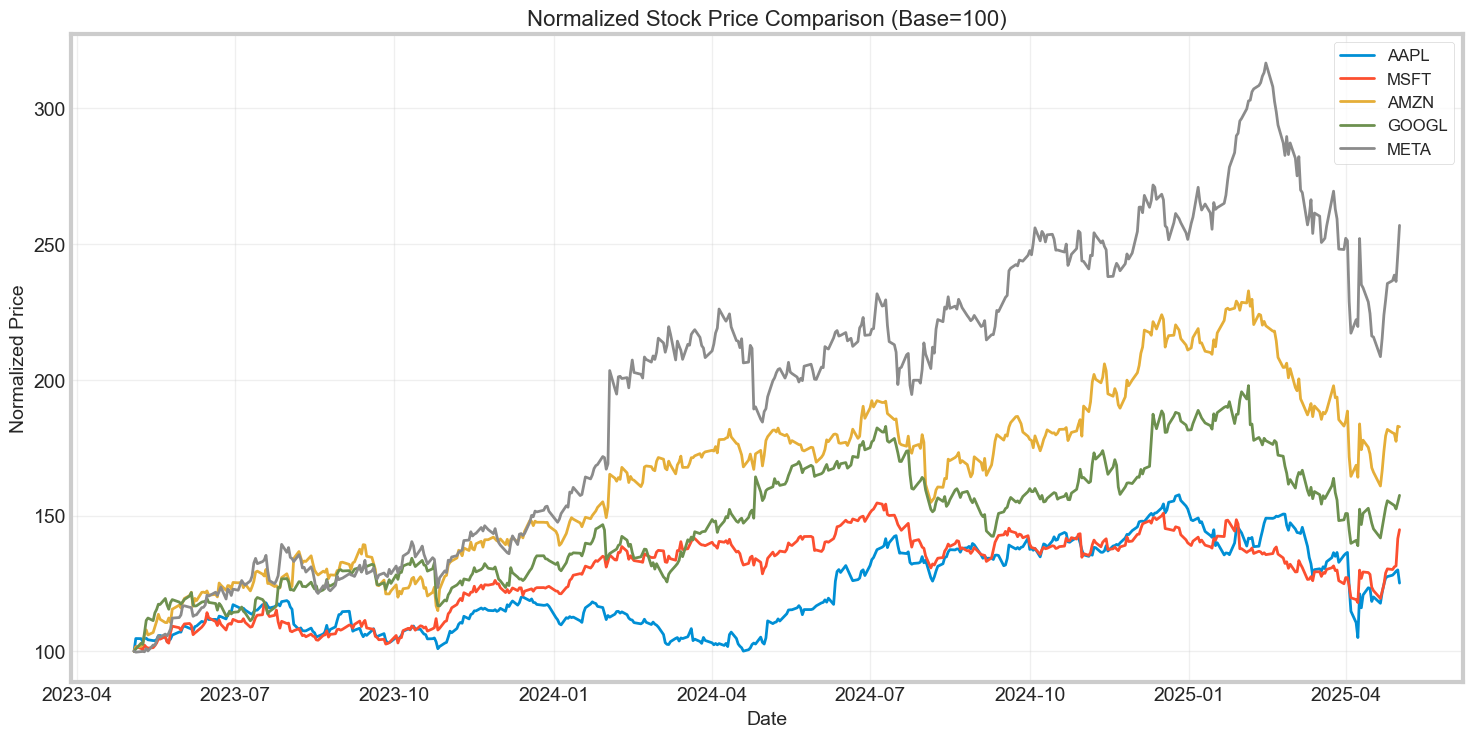

In [5]:
# Function to align and compare stock prices
def align_stock_prices(stock_dict):
    """
    Align closing prices from multiple stocks into a single DataFrame
    
    Parameters:
    stock_dict (dict): Dictionary of StockData objects
    
    Returns:
    DataFrame: DataFrame with aligned closing prices for all stocks
    """
    aligned_prices = pd.DataFrame()
    
    for symbol, stock in stock_dict.items():
        if stock.hist_data_2y is not None and not stock.hist_data_2y.empty:
            aligned_prices[symbol] = stock.hist_data_2y['Close']
    
    # Handle different trading days by forward and backward filling
    aligned_prices = aligned_prices.fillna(method='ffill').fillna(method='bfill')
    
    return aligned_prices

# Get aligned price data
aligned_prices = align_stock_prices(stocks)

# Create a normalized price chart
def create_normalized_price_chart(price_df):
    """Create a normalized price chart for comparing percentage gains"""
    normalized = price_df.copy()
    for col in normalized.columns:
        normalized[col] = 100 * (normalized[col] / normalized[col].iloc[0])
    
    plt.figure(figsize=(16, 8))
    for col in normalized.columns:
        plt.plot(normalized.index, normalized[col], linewidth=2, label=col)
    
    plt.title('Normalized Stock Price Comparison (Base=100)', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Normalized Price', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return normalized

# Plot normalized prices
normalized_prices = create_normalized_price_chart(aligned_prices)

## Returns Comparison

Let's compare the returns and volatility for all stocks.

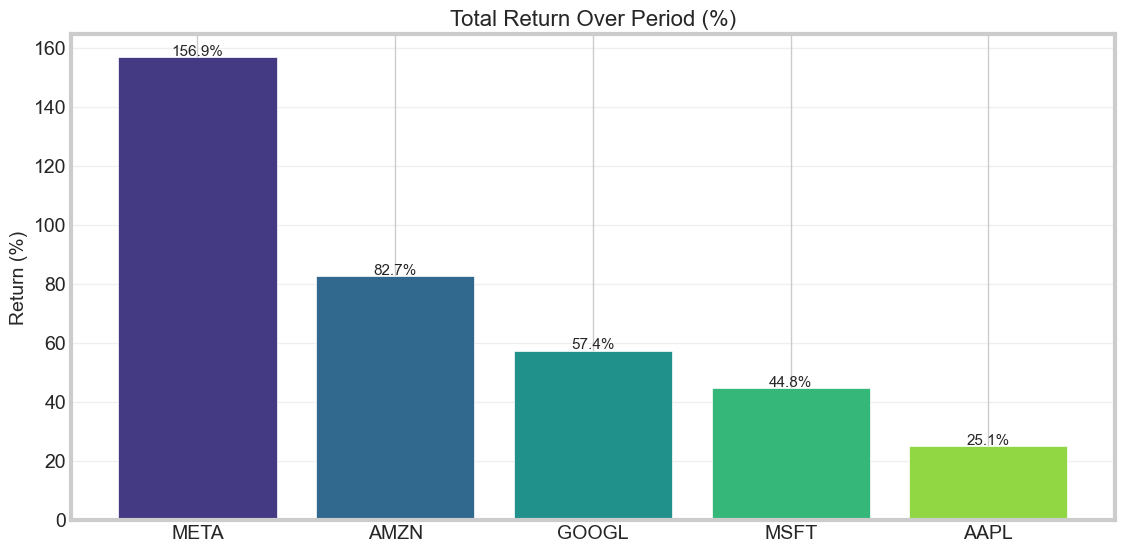

,Daily Avg Return (%),Daily Volatility (%),Annualized Return (%),Annualized Volatility (%),Sharpe Ratio,Total Return (%)
META,0.214176,2.274348,53.972315,36.104150,1.494906,156.866116
AMZN,0.139932,1.972627,35.262940,31.314479,1.126091,82.673073
GOOGL,0.108037,1.857963,27.225449,29.494246,0.923077,57.430717
MSFT,0.084995,1.483967,21.418782,23.557242,0.909223,44.789935
AAPL,0.059206,1.705120,14.919872,27.067943,0.551201,25.110633


In [6]:
def compare_returns(price_df):
    """Compare returns metrics across stocks"""
    # Calculate daily returns
    daily_returns = price_df.pct_change().dropna()
    
    # Calculate summary statistics
    returns_stats = pd.DataFrame()
    returns_stats['Daily Avg Return (%)'] = daily_returns.mean() * 100
    returns_stats['Daily Volatility (%)'] = daily_returns.std() * 100
    returns_stats['Annualized Return (%)'] = daily_returns.mean() * 252 * 100
    returns_stats['Annualized Volatility (%)'] = daily_returns.std() * np.sqrt(252) * 100
    returns_stats['Sharpe Ratio'] = returns_stats['Annualized Return (%)'] / returns_stats['Annualized Volatility (%)']
    
    # Calculate cumulative returns
    start_prices = price_df.iloc[0]
    end_prices = price_df.iloc[-1]
    total_returns = ((end_prices - start_prices) / start_prices) * 100
    returns_stats['Total Return (%)'] = total_returns
    
    # Sort by total return
    returns_stats = returns_stats.sort_values('Total Return (%)', ascending=False)
    
    # Create a bar chart of total returns
    plt.figure(figsize=(12, 6))
    bars = plt.bar(returns_stats.index, returns_stats['Total Return (%)'], color=sns.color_palette("viridis", len(returns_stats)))
    plt.title('Total Return Over Period (%)', fontsize=16)
    plt.ylabel('Return (%)', fontsize=14)
    plt.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.1f}%', ha='center', fontsize=11)
    
    plt.show()
    
    return returns_stats, daily_returns

# Compare returns
returns_stats, daily_returns = compare_returns(aligned_prices)
display(returns_stats)

## Correlation Analysis

Let's analyze how these stocks are correlated with each other.

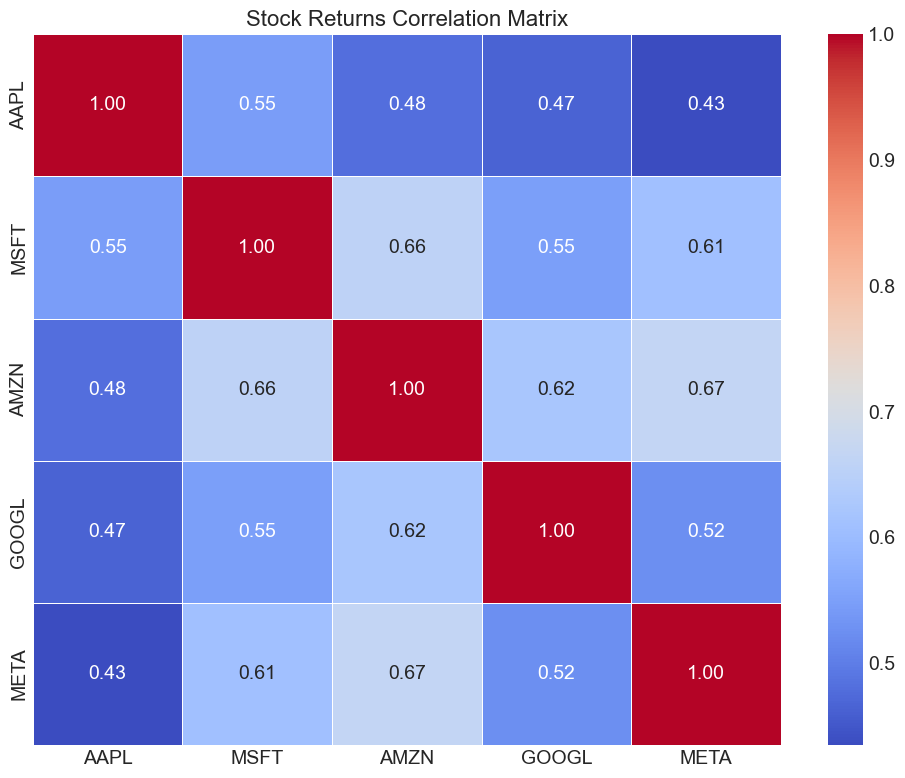

In [7]:
def create_correlation_heatmap(returns_df):
    """Create a correlation heatmap for stock returns"""
    # Calculate correlation matrix
    correlation_matrix = returns_df.corr()
    
    # Create heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
    plt.title('Stock Returns Correlation Matrix', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    return correlation_matrix

# Create correlation heatmap
correlation_matrix = create_correlation_heatmap(daily_returns)

## Financial Ratio Comparison

Let's compare key financial ratios for all stocks using our FinancialAnalysis module.

In [8]:
def compare_financial_ratios(stock_dict):
    """Compare financial ratios across stocks"""
    # Initialize dictionary to store ratios for each stock
    all_ratios = {}
    
    # Calculate ratios for each stock
    for symbol, stock in stock_dict.items():
        fin_analysis = FinancialAnalysis(stock)
        ratios = fin_analysis.calculate_financial_ratios()
        all_ratios[symbol] = ratios
    
    # Create a comparative DataFrame for key metrics
    key_metrics = ['P/E Ratio', 'P/B Ratio', 'P/S Ratio', 'EV/EBITDA', 
                   'Gross Margin', 'Net Profit Margin', 'ROE', 'Debt-to-Equity']
    
    comparative_df = pd.DataFrame(index=key_metrics)
    
    # Fill the DataFrame with values from each stock
    for symbol, ratios in all_ratios.items():
        values = [ratios.get(metric, 'N/A') for metric in key_metrics]
        comparative_df[symbol] = values
    
    # Format the DataFrame to handle different data types
    formatted_df = comparative_df.copy()
    
    # Format percentage values
    percentage_rows = ['Gross Margin', 'Net Profit Margin', 'ROE']
    for idx, row in formatted_df.iterrows():
        if idx in percentage_rows:
            formatted_df.loc[idx] = formatted_df.loc[idx].apply(
                lambda x: f"{float(x):.2%}" if isinstance(x, (int, float)) else x)
        else:
            formatted_df.loc[idx] = formatted_df.loc[idx].apply(
                lambda x: f"{float(x):.2f}" if isinstance(x, (int, float)) else x)
    
    return formatted_df, comparative_df

# Compare financial ratios
formatted_ratios, raw_ratios = compare_financial_ratios(stocks)
display(formatted_ratios)

,AAPL,MSFT,AMZN,GOOGL,META
P/E Ratio,31.94,33.66,30.94,18.31,23.37
P/B Ratio,45.93,10.05,6.59,5.77,8.14
P/S Ratio,7.66,11.98,3.10,5.56,8.85
EV/EBITDA,22.44,21.86,16.29,14.18,16.83
Gross Margin,46.63%,69.07%,49.16%,58.59%,81.77%
Net Profit Margin,24.30%,35.79%,10.14%,30.86%,39.11%
ROE,138.01%,33.61%,25.24%,34.79%,39.84%
Debt-to-Equity,146.99,32.63,43.56,8.25,26.76


## Visualize Key Financial Metrics

Let's create some visual comparisons of key financial metrics.

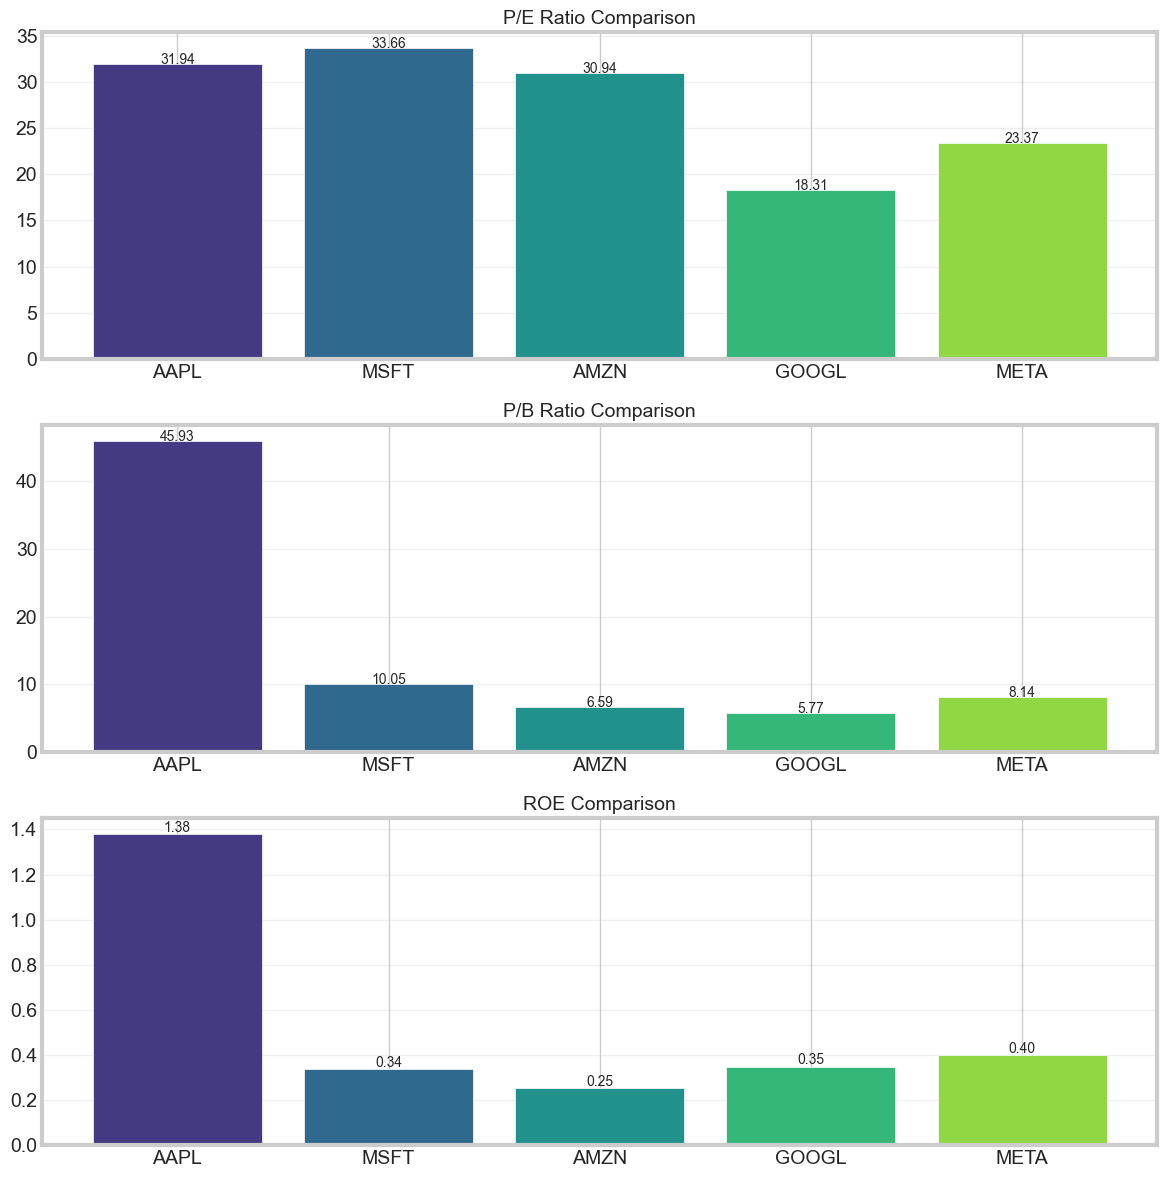

In [9]:
def plot_financial_metrics(comparative_df, metrics):
    """Create bar charts for selected financial metrics"""
    num_metrics = len(metrics)
    fig, axes = plt.subplots(num_metrics, 1, figsize=(12, 4 * num_metrics))
    
    if num_metrics == 1:
        axes = [axes]  # Make it iterable if only one metric
    
    for i, metric in enumerate(metrics):
        ax = axes[i]
        if metric in comparative_df.index:
            data = comparative_df.loc[metric].astype(float)
            # Filter out non-numeric values
            data = data[~np.isnan(data)]
            
            bars = ax.bar(data.index, data, color=sns.color_palette("viridis", len(data)))
            
            ax.set_title(f'{metric} Comparison', fontsize=14)
            ax.grid(axis='y', alpha=0.3)
            
            # Add labels on top of bars
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                        f'{height:.2f}', ha='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()

# Plot selected financial metrics
plot_financial_metrics(raw_ratios, ['P/E Ratio', 'P/B Ratio', 'ROE'])

## Technical Analysis Comparison

Now let's compare technical indicators for each stock using our TechnicalAnalysis module.

In [10]:
def compare_technical_indicators(stock_dict):
    """Compare technical indicators across stocks"""
    # Initialize dictionary to store technical indicators for each stock
    all_tech_indicators = {}
    
    # Calculate technical indicators for each stock
    for symbol, stock in stock_dict.items():
        tech_analysis = TechnicalAnalysis(stock)
        tech_data = tech_analysis.calculate_technical_indicators()
        recent_indicators = tech_analysis.get_recent_indicators(tech_data)
        all_tech_indicators[symbol] = recent_indicators
    
    # Create a comparative DataFrame for key indicators
    key_indicators = ['RSI', 'MACD', 'MACD_Histogram', 'ATR']
    comparative_df = pd.DataFrame(index=key_indicators)
    
    # Fill the DataFrame with values from each stock
    for symbol, indicators in all_tech_indicators.items():
        values = [indicators.get(indicator, 'N/A') for indicator in key_indicators]
        comparative_df[symbol] = values
    
    return comparative_df

# Compare technical indicators
tech_indicators_df = compare_technical_indicators(stocks)
display(tech_indicators_df)

,AAPL,MSFT,AMZN,GOOGL,META
RSI,57.614226,71.909785,55.131554,59.566780,64.671975
MACD,-0.723095,7.662040,-1.329016,0.022468,-3.852738
MACD_Histogram,2.237193,6.722461,2.318682,1.665684,11.432015
ATR,6.983572,12.720712,7.077861,4.717855,23.467858


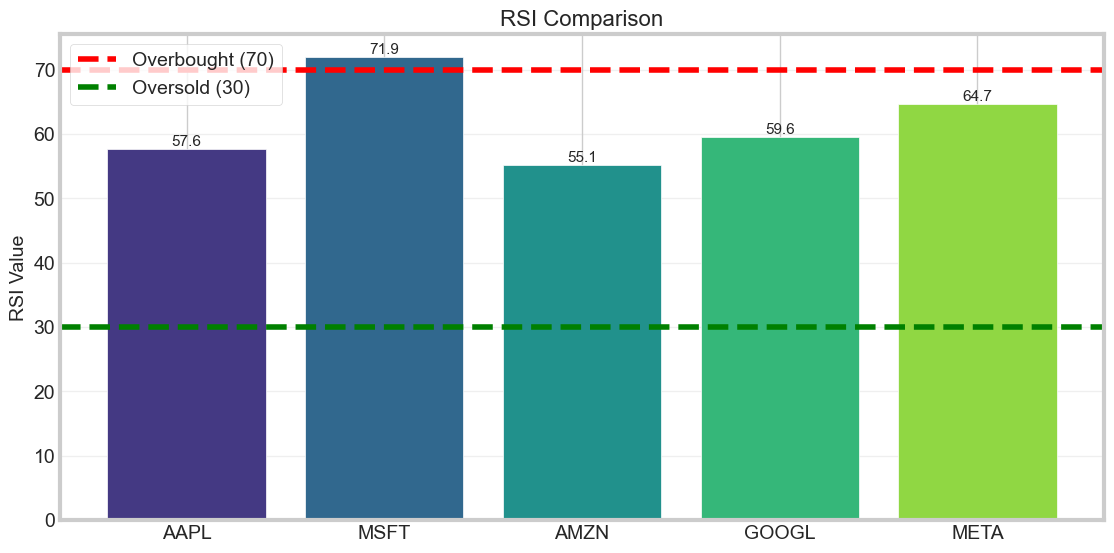

In [11]:
# Plot RSI comparison
plt.figure(figsize=(12, 6))
bars = plt.bar(tech_indicators_df.columns, tech_indicators_df.loc['RSI'], color=sns.color_palette("viridis", len(tech_indicators_df.columns)))

plt.title('RSI Comparison', fontsize=16)
plt.ylabel('RSI Value', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.legend()

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.1f}', ha='center', fontsize=11)

plt.show()

## Stock Visualization using our StockVisualization Module

Now let's visualize one stock in detail using the StockVisualization module.

Generating visualizations for AAPL...


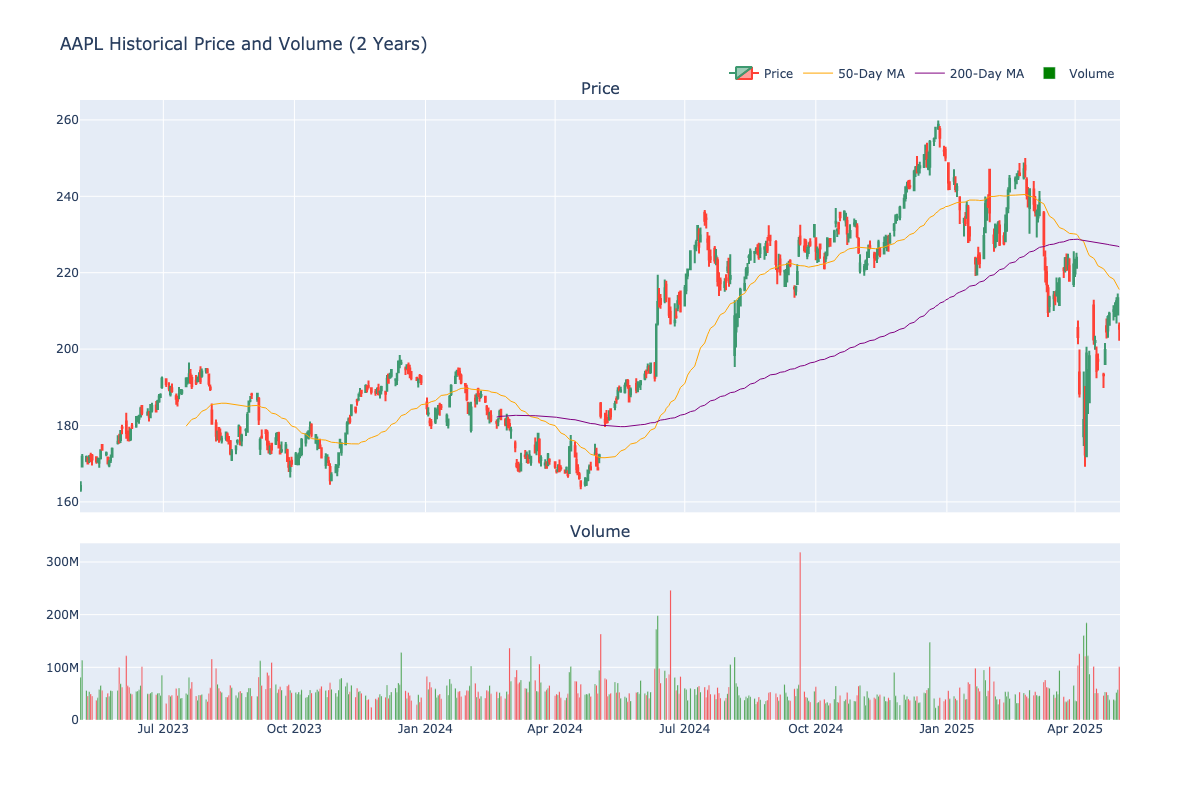

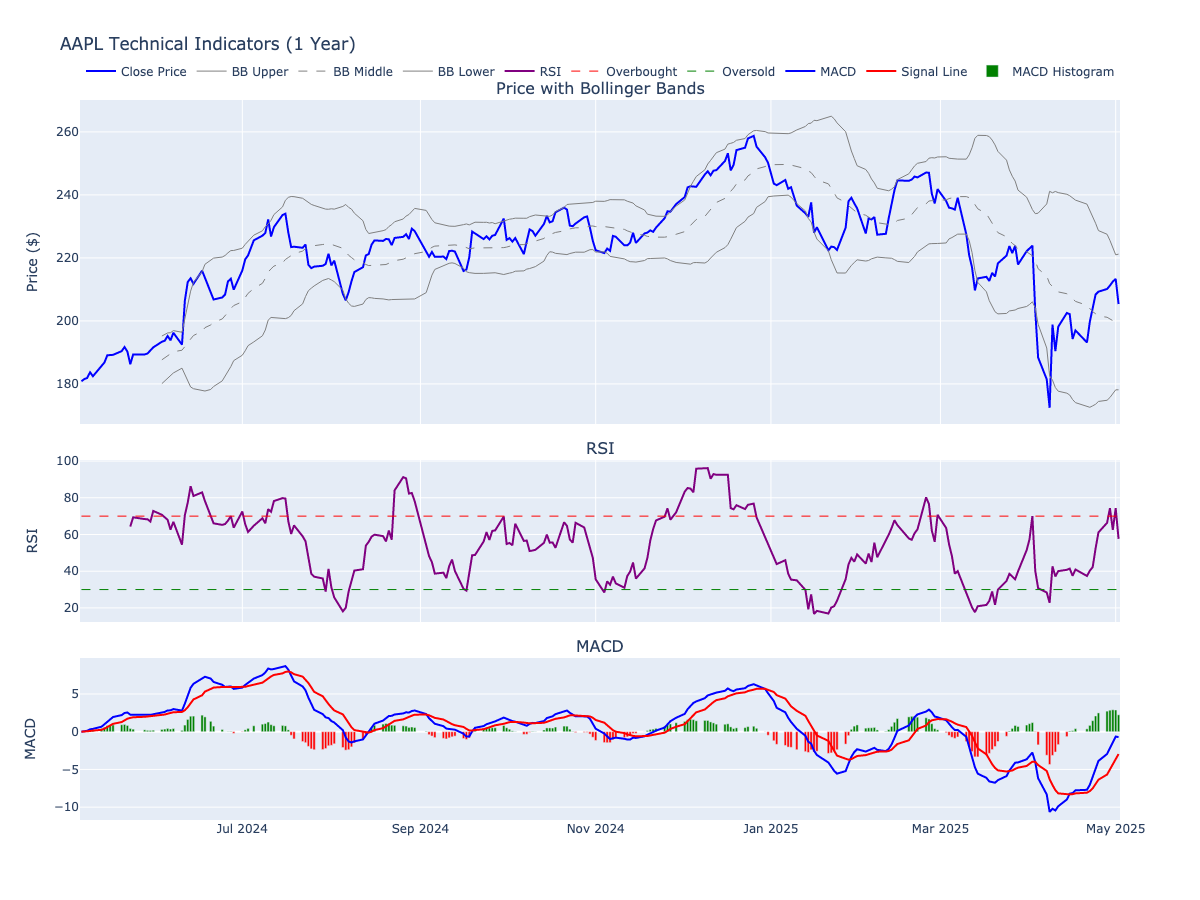

In [12]:
def create_stock_visuals(symbol, stock):
    """Create visualizations for a specific stock using our StockVisualization class"""
    print(f"Generating visualizations for {symbol}...")
    viz = StockVisualization(stock)
    
    # Create price and volume chart
    price_volume_chart = viz.create_price_volume_chart()
    viz.safe_plot_display(price_volume_chart)
    
    # Get technical indicators and create technical chart
    tech_analysis = TechnicalAnalysis(stock)
    tech_data = tech_analysis.calculate_technical_indicators()
    tech_chart = viz.create_technical_chart(tech_data)
    viz.safe_plot_display(tech_chart)

# Create visualizations for a selected stock (e.g., the first one in the list)
if stocks:
    first_symbol = list(stocks.keys())[0]
    create_stock_visuals(first_symbol, stocks[first_symbol])

## Moving Average Comparison

Let's compare the moving averages of all stocks to identify trends.

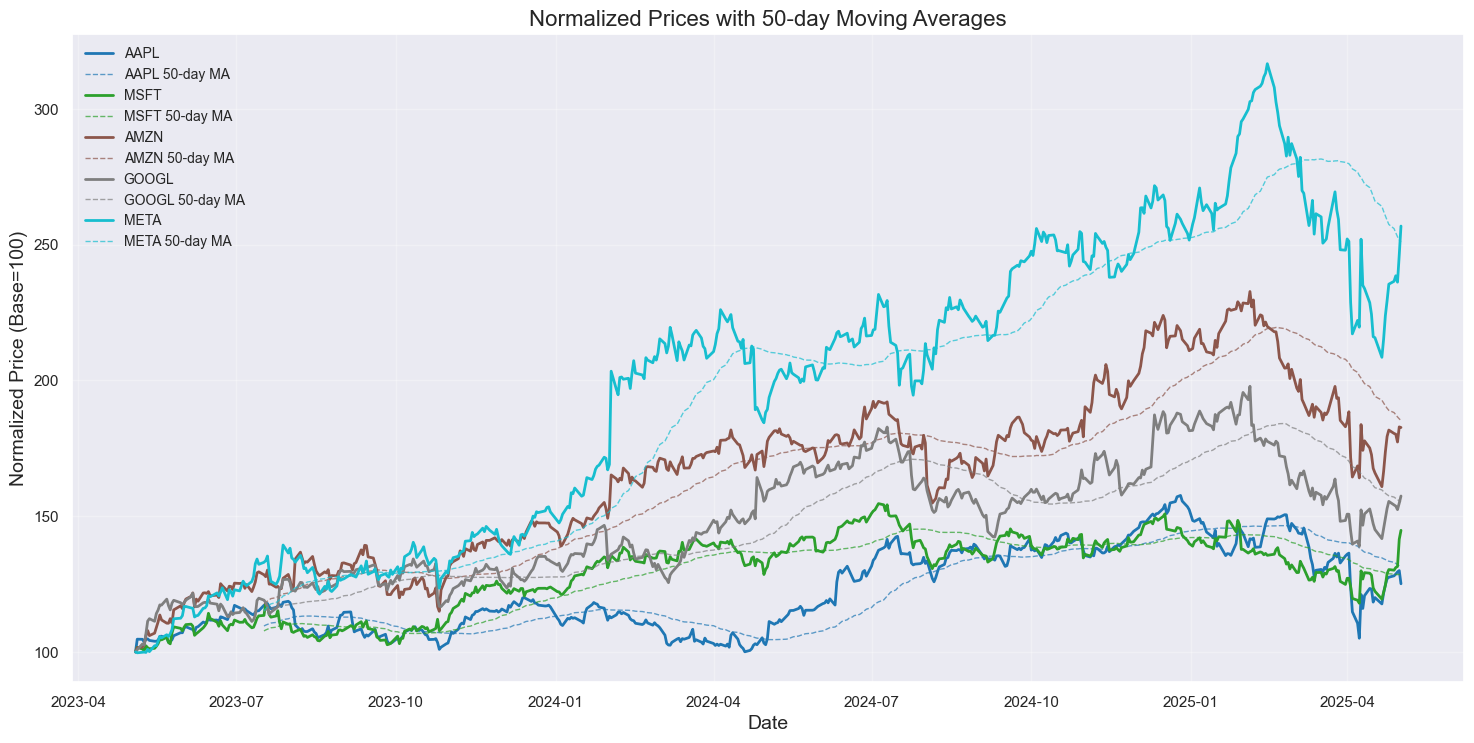

In [13]:
def compare_moving_averages(aligned_prices, windows=[50]):
    """Compare moving averages across stocks"""
    # Create a copy of aligned prices
    normalized = aligned_prices.copy()
    
    # Normalize to 100 at start for fairer comparison
    for col in normalized.columns:
        normalized[col] = 100 * (normalized[col] / normalized[col].iloc[0])
    
    # Create figure
    plt.figure(figsize=(16, 8))
    colors = plt.cm.tab10(np.linspace(0, 1, len(normalized.columns)))
    
    # For each stock
    for i, symbol in enumerate(normalized.columns):
        # Plot price
        plt.plot(normalized.index, normalized[symbol], label=f'{symbol}',
                linewidth=2, color=colors[i])
        
        # Plot moving averages
        for window in windows:
            ma = normalized[symbol].rolling(window=window).mean()
            plt.plot(normalized.index, ma, label=f'{symbol} {window}-day MA',
                    linewidth=1, linestyle='--', color=colors[i], alpha=0.7)
    
    plt.title(f'Normalized Prices with {windows[0]}-day Moving Averages', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Normalized Price (Base=100)', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.show()

# Compare 50-day moving averages
compare_moving_averages(aligned_prices, [50])

## AI-Powered Comparative Analysis

Let's use our AIAnalysis module to generate a comparative analysis of these stocks.

In [14]:
# Initialize AI analysis module
ai = AIAnalysis()

# Check if we have the AI client available
if not hasattr(ai, 'client') or ai.client is None:
    print("\nOpenAI API key not configured. Skipping AI analysis.")
    print("Set OPENAI_API_KEY environment variable to enable this feature.")
else:
    print("\nGenerating AI-powered comparative analysis...")
    
    # We can also add sector information for additional context
    sector_info = {}
    for symbol, stock in stocks.items():
        company_info = stock.get_company_info()
        if 'sector' in company_info:
            sector = company_info['sector']
            if sector not in sector_info:
                sector_info[sector] = []
            sector_info[sector].append(symbol)
    
    sector_context = "\n".join([f"{sector}: {', '.join(symbols)}" for sector, symbols in sector_info.items()])
    
    # Use the new compare_stocks method from AIAnalysis
    comparative_analysis = ai.compare_stocks(
        symbols=list(stocks.keys()),
        returns_stats=returns_stats,
        correlation_matrix=correlation_matrix,
        financial_ratios=formatted_ratios,
        tech_indicators=tech_indicators_df,
        sector_info=sector_context
    )

OpenAI client initialized successfully.

Generating AI-powered comparative analysis...


In [15]:
display(Markdown(comparative_analysis))

# Comparative Stock Analysis: AAPL, MSFT, AMZN, GOOGL, META

## 1. Performance Comparison
- **Returns**:
  - **META**: Highest annualized return at 53.97% and total return of 156.87%.
  - **AMZN**: Second highest annualized return at 35.26% with a total return of 82.67%.
  - **GOOGL**: Annualized return of 27.23% with a total return of 57.43%.
  - **MSFT**: Annualized return of 21.42% with a total return of 44.79%.
  - **AAPL**: Lowest annualized return at 14.92% and total return of 25.11%.

- **Volatility**:
  - **META**: Highest annualized volatility at 36.10%.
  - **AMZN**: 31.31% volatility.
  - **GOOGL**: 29.49% volatility.
  - **MSFT**: 23.56% volatility.
  - **AAPL**: Lowest volatility at 27.07%.

- **Risk-Adjusted Metrics (Sharpe Ratio)**:
  - **META**: Highest Sharpe ratio at 1.49, indicating superior risk-adjusted returns.
  - **AMZN**: Sharpe ratio of 1.13.
  - **GOOGL**: Sharpe ratio of 0.92.
  - **MSFT**: Sharpe ratio of 0.91.
  - **AAPL**: Lowest Sharpe ratio at 0.55, indicating less attractive risk-adjusted returns.

## 2. Correlation Analysis
- **Correlation Coefficients**:
  - **AAPL**: Moderate correlation with MSFT (0.55) and lower with AMZN (0.48), GOOGL (0.47), and META (0.43).
  - **MSFT**: High correlation with AMZN (0.66) and moderate with GOOGL (0.55) and META (0.61).
  - **AMZN**: High correlation with META (0.67) and moderate with GOOGL (0.62).
  - **GOOGL**: Moderate correlation with META (0.52).

- **Implications for Diversification**:
  - High correlations among MSFT, AMZN, and META suggest that they may move together, reducing diversification benefits.
  - AAPL and GOOGL show lower correlations with other stocks, potentially providing better diversification in a portfolio.

## 3. Valuation Comparison
- **P/E Ratio**:
  - **GOOGL**: Lowest at 18.31, indicating it may be undervalued relative to earnings.
  - **AMZN**: 30.94, slightly above average.
  - **META**: 23.37, reasonable valuation.
  - **AAPL**: 31.94, relatively high.
  - **MSFT**: Highest at 33.66, suggesting it may be overvalued.

- **P/B Ratio**:
  - **AAPL**: Highest at 45.93, indicating high market expectations.
  - **MSFT**: 10.05, reasonable.
  - **AMZN**: 6.59, attractive.
  - **GOOGL**: 5.77, attractive.
  - **META**: 8.14, reasonable.

- **EV/EBITDA**:
  - **GOOGL**: Lowest at 14.18, indicating it may be undervalued.
  - **AMZN**: 16.29, reasonable.
  - **META**: 16.83, reasonable.
  - **MSFT**: 21.86, relatively high.
  - **AAPL**: 22.44, relatively high.

## 4. Financial Health Comparison
- **Profitability**:
  - **META**: Highest net profit margin at 39.11% and gross margin at 81.77%.
  - **MSFT**: High net profit margin at 35.79%.
  - **GOOGL**: Strong net profit margin at 30.86%.
  - **AAPL**: 24.30%, lower than peers.
  - **AMZN**: Lowest net profit margin at 10.14%.

- **Debt Levels**:
  - **GOOGL**: Lowest debt-to-equity ratio at 8.25, indicating strong financial health.
  - **META**: Moderate at 26.76.
  - **AMZN**: 43.56, manageable.
  - **MSFT**: 32.63, reasonable.
  - **AAPL**: Highest at 146.99, indicating potential risk.

## 5. Technical Outlook Comparison
- **Relative Strength Index (RSI)**:
  - **MSFT**: Overbought at 71.91, indicating potential for price correction.
  - **META**: Healthy at 64.67.
  - **GOOGL**: Neutral at 59.57.
  - **AMZN**: Neutral at 55.13.
  - **AAPL**: Neutral at 57.61.

- **MACD**:
  - **MSFT**: Strong bullish momentum with a positive MACD of 7.66.
  - **META**: Negative MACD of -3.85, indicating bearish momentum.
  - **GOOGL**: Neutral with a MACD of 0.02.
  - **AMZN**: Negative MACD of -1.33.
  - **AAPL**: Negative MACD of -0.72.

## 6. Relative Strengths and Weaknesses
- **AAPL**:
  - **Strengths**: Strong brand, high ROE.
  - **Weaknesses**: High debt levels, lower returns.

- **MSFT**:
  - **Strengths**: Strong profitability, good technical momentum.
  - **Weaknesses**: High valuation ratios.

- **AMZN**:
  - **Strengths**: Strong growth potential, reasonable valuations.
  - **Weaknesses**: Lower profitability margins.

- **GOOGL**:
  - **Strengths**: Strong financial health, attractive valuations.
  - **Weaknesses**: Moderate growth compared to peers.

- **META**:
  - **Strengths**: Highest returns, strong profitability.
  - **Weaknesses**: High volatility.

## 7. Investment Recommendation Ranking
1. **META**: Best overall performance, highest returns, and profitability metrics.
2. **AMZN**: Strong growth potential with reasonable valuations, despite lower profitability.
3. **GOOGL**: Attractive valuations and strong financial health, good for conservative investors.
4. **MSFT**: Strong profitability but high valuations; suitable for growth-focused investors.
5. **AAPL**: Strong brand but lower returns and high debt levels; less attractive compared to peers.

### Conclusion
Investors should consider their risk tolerance and investment goals when selecting stocks from this group. META and AMZN offer the best growth potential, while GOOGL provides stability with attractive valuations. MSFT and AAPL may be better suited for those seeking established companies with strong fundamentals but may not offer the same growth prospects as META and AMZN.

## Summary

In this notebook, we have leveraged our existing stock analysis modules to perform comprehensive side-by-side comparisons of multiple stocks. Key analyses included:

1. Price performance comparison with normalized charts
2. Returns and risk metrics comparison
3. Correlation analysis between stocks
4. Financial ratio comparison across companies
5. Technical indicator comparison
6. Moving average trend comparison
7. AI-powered comparative analysis

This approach demonstrates the flexibility and reusability of our modular architecture for stock analysis.